In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sklearn

# Import

In [205]:
INPUT_FILE_PATH = './Entities.csv'

In [206]:
df = pd.read_csv(INPUT_FILE_PATH)

In [207]:
df

,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,NaN,NaN,1089.004
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,NaN,NaN,15246.056
2,2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,NaN,NaN,2178.008
3,3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,4/5/2019,NaN,NaN,10890.000
4,4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,168441,17355248,6754,https://www.zameen.com/Property/gulshan_e_maym...,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,For Sale,6,7/18/2019,Al Shahab Enterprises,Shahmir,26136.096
168442,168442,17355249,680,https://www.zameen.com/Property/gadap_town_gul...,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,For Sale,3,7/18/2019,Al Shahab Enterprises,Shahmir,2178.008
168443,168443,17355250,6757,https://www.zameen.com/Property/gulshan_e_maym...,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,For Sale,6,7/18/2019,Al Shahab Enterprises,Shahmir,26136.096
168444,168444,17355251,6752,https://www.zameen.com/Property/gulshan_e_maym...,House,11000000,Gadap Town,Karachi,Sindh,25.013265,67.120818,0,For Sale,3,7/18/2019,Al Shahab Enterprises,Shahmir,21235.578


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     168446 non-null  int64  
 1   property_id    168446 non-null  int64  
 2   location_id    168446 non-null  int64  
 3   page_url       168446 non-null  object 
 4   property_type  168446 non-null  object 
 5   price          168446 non-null  int64  
 6   location       168446 non-null  object 
 7   city           168446 non-null  object 
 8   province_name  168446 non-null  object 
 9   latitude       168446 non-null  float64
 10  longitude      168446 non-null  float64
 11  baths          168446 non-null  int64  
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Total_Area     168446 non-nul

In [209]:
df.describe()

,Unnamed: 0,property_id,location_id,price,latitude,longitude,baths,bedrooms,Total_Area
count,168446.000000,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,1.684460e+05
mean,84222.500000,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,1.394239e+04
std,48626.316059,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,8.623647e+05
min,0.000000,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000e+00
25%,42111.250000,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,1.905757e+03
50%,84222.500000,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,4.356016e+03
75%,126333.750000,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,1.197904e+04
max,168445.000000,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,3.387988e+08


In [210]:
X = df[['Total_Area']].copy()

In [211]:
type(X)

pandas.core.frame.DataFrame

In [212]:
X

,Total_Area
0,1089.004
1,15246.056
2,2178.008
3,10890.000
4,2178.008
...,...
168441,26136.096
168442,2178.008
168443,26136.096
168444,21235.578


In [213]:
y = df['price']

In [214]:
y

0         10000000
1          6900000
2         16500000
3         43500000
4          7000000
            ...   
168441    26500000
168442    12500000
168443    27000000
168444    11000000
168445     9000000
Name: price, Length: 168446, dtype: int64

(array([1.68441e+05, 1.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([0.00000000e+00, 6.77597580e+06, 1.35519516e+07, 2.03279274e+07,
        2.71039032e+07, 3.38798790e+07, 4.06558548e+07, 4.74318306e+07,
        5.42078064e+07, 6.09837822e+07, 6.77597580e+07, 7.45357338e+07,
        8.13117096e+07, 8.80876854e+07, 9.48636612e+

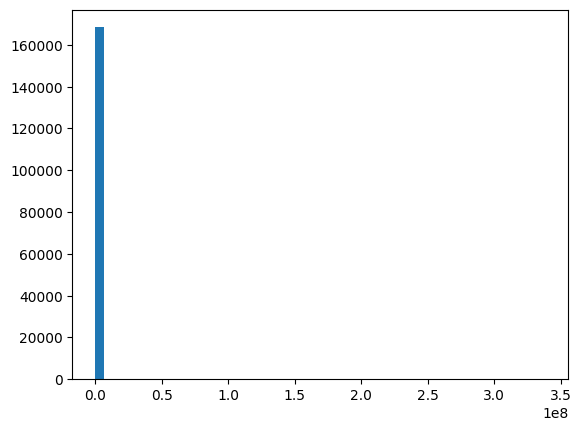

In [215]:
plt.hist(X, bins=50)

(array([1.2671e+05, 2.2635e+04, 9.2450e+03, 3.5100e+03, 1.8170e+03,
        1.2150e+03, 8.9900e+02, 6.5500e+02, 3.7100e+02, 3.3800e+02,
        2.0500e+02, 1.4500e+02, 1.6700e+02, 7.7000e+01, 8.4000e+01,
        9.3000e+01, 3.8000e+01, 6.3000e+01, 2.0000e+01, 1.6000e+01,
        3.2000e+01, 1.2000e+01, 1.9000e+01, 3.0000e+00, 4.0000e+00,
        9.0000e+00, 1.0000e+00, 1.4000e+01, 1.0000e+00, 0.0000e+00,
        8.0000e+00, 1.0000e+00, 7.0000e+00, 1.0000e+00, 1.0000e+00,
        3.0000e+00, 1.0000e+00, 5.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 4.0000e+00, 0.0000e+00, 1.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.00

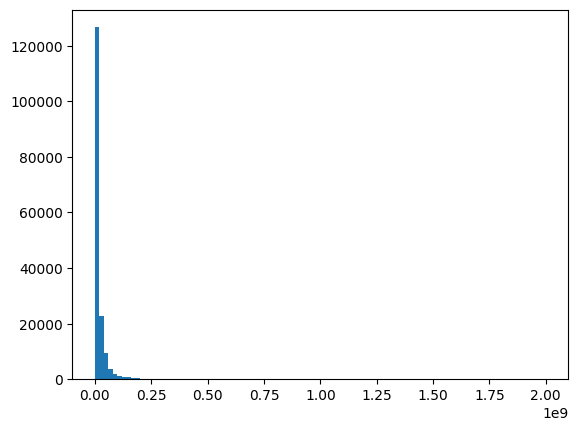

In [216]:
plt.hist(y, bins=100)

In [217]:
X.mean()

Total_Area    13942.39353
dtype: float64

In [218]:
np.mean(X)

/home/eog/Documents/Python_pr/python-ai/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Total_Area    13942.39353
dtype: float64

In [219]:
X.std()

Total_Area    862364.74004
dtype: float64

In [220]:
anomaly_inputs = ['price', 'Total_Area', 'latitude', 'longitude', 'baths', 'bedrooms']

In [221]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0).fit(df[anomaly_inputs])
outliers = clf.predict(df[anomaly_inputs])

In [222]:
df['outliers'] = outliers

In [223]:
df['outliers'].value_counts()

 1    138730
-1     29716
Name: outliers, dtype: int64

In [224]:
np.percentile(X, 5)

816.7529999999999

In [225]:
np.percentile(X, 95)

38659.642

In [226]:
X

,Total_Area
0,1089.004
1,15246.056
2,2178.008
3,10890.000
4,2178.008
...,...
168441,26136.096
168442,2178.008
168443,26136.096
168444,21235.578


In [227]:
X_train = X[:7000]
X_test = X[7000:]

In [228]:
X_train

,Total_Area
0,1089.004
1,15246.056
2,2178.008
3,10890.000
4,2178.008
...,...
6995,12795.797
6996,10345.538
6997,9256.534
6998,1905.757


In [229]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [230]:
X_train

,Total_Area
52865,8984.283
117841,2722.510
78577,29675.359
34765,2722.510
23369,103455.000
...,...
119879,2722.510
103694,1361.255
131932,2722.510
146867,65340.000


In [231]:
from sklearn import linear_model

In [232]:
reg = linear_model.SGDRegressor()

In [233]:
reg

SGDRegressor()

In [234]:
reg.fit(X_train, y_train)

SGDRegressor()

In [235]:
reg.coef_

array([7.94123407e+15])

In [236]:
reg.intercept_

array([-2.57584407e+13])

In [237]:
reg.predict([[25000, ]])

/home/eog/Documents/Python_pr/python-ai/.venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


array([1.98530826e+20])

In [238]:
y_pred = reg.predict(X_test)

In [239]:
y_pred

array([4.32399938e+19, 2.01066804e+20, 2.16200634e+19, ...,
       4.10781437e+19, 4.32399208e+18, 5.18880208e+20])

In [240]:
reg.score(X_test, y_test)

-7.979343686634237e+25

In [241]:
from sklearn.metrics import r2_score

In [242]:
r2_score(y_test, y_pred)

-7.979343686634237e+25

In [243]:
y_true = (np.array([1, 2, 3, 4, 5]) - np.array([1, 2, 3, 4, 5]).mean()) / np.array([1, 2, 3, 4, 5]).std()

In [244]:
np.array(y_true).mean()

0.0

In [245]:
y_pred = ((np.array([5, 4, 3, 2, 1]) * -1) - (np.array([5, 4, 3, 2, 1]) * -1).mean()) / (np.array([5, 4, 3, 2, 1]) * -1).std()

In [246]:
r2_score(y_true, y_pred)

1.0

In [247]:
y_true = [1,3,2,4,5]

In [248]:
y_pred = [1,2,3,4,5]

In [249]:
sklearn.metrics.r2_score(y_true, y_pred)

0.8

In [250]:
import sklearn.metrics

In [251]:
sklearn.metrics.max_error(y_true, y_pred)

1

In [252]:
np.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))

0.6324555320336759

In [253]:
X_train

,Total_Area
52865,8984.283
117841,2722.510
78577,29675.359
34765,2722.510
23369,103455.000
...,...
119879,2722.510
103694,1361.255
131932,2722.510
146867,65340.000


In [254]:
X_train

,Total_Area
52865,8984.283
117841,2722.510
78577,29675.359
34765,2722.510
23369,103455.000
...,...
119879,2722.510
103694,1361.255
131932,2722.510
146867,65340.000


In [255]:
y_train

52865       2800000
117841     16500000
78577      35000000
34765      20000000
23369     150000000
            ...    
119879     23500000
103694     15000000
131932       150000
146867     80000000
121958      4500000
Name: price, Length: 117912, dtype: int64

In [256]:
X_test

,Total_Area
49309,5445.000
42561,25319.343
1398,2722.510
81279,544.502
18347,2722.510
...,...
8535,1089.004
145116,816.753
19147,5172.769
45560,544.502


In [257]:
y_test

49309     87500000
42561        55000
1398      21800000
81279      6500000
18347        75000
            ...   
8535       5000000
145116     9000000
19147     40000000
45560      3200000
133910    90000000
Name: price, Length: 50534, dtype: int64

In [258]:
import tensorflow as tf
from tensorflow import keras

In [259]:
model = keras.Sequential()

model.add(keras.layers.Flatten(input_shape=(1, )))
model.add(keras.layers.Dense(64, activation='relu', name='dense_1'))
model.add(keras.layers.Dense(8, activation='relu', name='dense_2'))
model.add(keras.layers.Dense(1, activation='linear', name='dense_output'))

In [260]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 1)                 0         
                                                                 
 dense_1 (Dense)             (None, 64)                128       
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_output (Dense)        (None, 1)                 9         
                                                                 
Total params: 657
Trainable params: 657
Non-trainable params: 0
_________________________________________________________________


In [261]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mape'])

In [262]:
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    verbose=1,
                    validation_split=0.2,
                    batch_size=32,
                    #callbacks=[tensorboard_callback]
                    )

Epoch 1/10


/home/eog/Documents/Python_pr/python-ai/.venv/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


2948/2948 [==============================] - 6s 2ms/step - loss: nan - mape: nan - val_loss: nan - val_mape: nan
Epoch 2/10
2948/2948 [==============================] - 5s 2ms/step - loss: nan - mape: nan - val_loss: nan - val_mape: nan
Epoch 3/10
2948/2948 [==============================] - 6s 2ms/step - loss: nan - mape: nan - val_loss: nan - val_mape: nan
Epoch 4/10
2948/2948 [==============================] - 5s 2ms/step - loss: nan - mape: nan - val_loss: nan - val_mape: nan
Epoch 5/10
2948/2948 [==============================] - 6s 2ms/step - loss: nan - mape: nan - val_loss: nan - val_mape: nan
Epoch 6/10
2948/2948 [==============================] - 5s 2ms/step - loss: nan - mape: nan - val_loss: nan - val_mape: nan
Epoch 7/10
2948/2948 [==============================] - 5s 2ms/step - loss: nan - mape: nan - val_loss: nan - val_mape: nan
Epoch 8/10
2948/2948 [==============================] - 5s 2ms/step - loss: nan - mape: nan - val_loss: nan - val_mape: nan
Epoch 9/10
2948/294

In [263]:
model.evaluate(X_test, y_test)

1580/1580 [==============================] - 2s 1ms/step - loss: nan - mape: nan


[nan, nan]

In [264]:
y_pred = model.predict(X_test)

1580/1580 [==============================] - 2s 1ms/step


In [265]:
sklearn.metrics.r2_score(y_test, y_pred)

ValueError: Input contains NaN.

In [ ]:
y_pred = model.predict([25000, ])

In [ ]:
y_pred

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
y_train

In [ ]:
y_test

Randon Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regr = RandomForestRegressor(max_depth=5, random_state=0)

In [ ]:
regr

In [ ]:
regr.fit(X_train, y_train)

In [ ]:
regr.predict([[25000, ]])

In [ ]:
y_pred = regr.predict(X_test)

In [ ]:
sklearn.metrics.r2_score(y_test, y_pred)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
regr = AdaBoostRegressor(random_state=0, n_estimators=100)

In [ ]:
regr.fit(X_train, y_train)

In [ ]:
y_pred = regr.predict(X_test)

In [ ]:
sklearn.metrics.r2_score(y_test, y_pred)

Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
reg = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
sklearn.metrics.r2_score(y_test, y_pred)

In [ ]:
import xgboost as xgb

In [ ]:
reg = xgb.XGBRegressor(
    tree_method="hist",
    #eval_metric=mean_absolute_error,
)

In [ ]:
reg.fit(X_train, y_train)

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
sklearn.metrics.r2_score(y_test, y_pred)